In [2]:
pip install mpld3

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.5-py3-none-any.whl size=200907 sha256=6aaf8da72b0e437305e2b32b036836d72adcad905dfbe31a5ef683c82d00094c
  Stored in directory: /root/.cache/pip/wheels/3b/f3/08/a11447ac4ea31d7603142e76b4cba9e48b2fa7d82b76b69731
Successfully built mpld3


In [26]:
#Libraries
import tweepy
import mpld3
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Twitter API Credentials
consumerKey = "zf4BZhG95UuNQ8UoILvsI3qAw"
consumerSecret = "uQahBfCxzvyrYMCll5tsCPUxECozDIejJVaFGb0kIZb8MCcgvb"
accessToken = "3303035127-lNip495SGwrTfG3qS0bdDvZMsvmCSAW8Qp9j5Cy"
accessTokenSecret = "HkO6t3r9WwbLzTlu16ydYBfGPsIgBbFcZs2YqDZFtmF5B"

In [28]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [29]:
userID = input("Enter Twitter User name: ")

Enter Twitter User name: HDROX007


In [30]:
posts = api.user_timeline(screen_name = userID, count = 100, lang = "en", tweet_mode = "extended")

i=1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

1) RT @niharika5461: @HemantSorenJMM @MVRaoIPS Dear Sir, My father - Arvind Kr. Singh was brutally murdered by Dhananjay Singh from Dhanbad. T…

2) RT @LPLive: Three years ago today, we lost an incredible talent.

A father, a husband, a bandmate, a very talented musician, and an importa…

3) @CarryMinati Naah😁
#HarryPotterMarathon https://t.co/gaaa2uV8M8

4) RT @ChrisEvans: This one is special. You guys have no idea... https://t.co/ELvt6w4blm

5) @BQQuinn @Xbox @jamessmurray Are you jealous of him ?😂😂😂



In [31]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @niharika5461: @HemantSorenJMM @MVRaoIPS De...
1,"RT @LPLive: Three years ago today, we lost an ..."
2,@CarryMinati Naah😁\n#HarryPotterMarathon https...
3,RT @ChrisEvans: This one is special. You guys ...
4,@BQQuinn @Xbox @jamessmurray Are you jealous o...


In [32]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+:', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"Dear Sir, My father - Arvind Kr. Singh was ..."
1,"Three years ago today, we lost an incredible ..."
2,Naah😁\nHarryPotterMarathon
3,This one is special. You guys have no idea...
4,Are you jealous of him ?😂😂😂
5,😂😂😂😂😂😂😂
6,Always
7,no words. so heartbroken. RIP Chester Benning...
8,"The first ever song that gave me goosbumps ""I..."
9,_Gatto Wish you a very very Happy Birthday Joe...


In [33]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Dear Sir, My father - Arvind Kr. Singh was ...",1.000000,-0.875000
1,"Three years ago today, we lost an incredible ...",0.950000,0.905000
2,Naah😁\nHarryPotterMarathon,0.000000,0.000000
3,This one is special. You guys have no idea...,0.571429,0.357143
4,Are you jealous of him ?😂😂😂,0.000000,0.000000
5,😂😂😂😂😂😂😂,0.000000,0.000000
6,Always,0.000000,0.000000
7,no words. so heartbroken. RIP Chester Benning...,0.000000,0.000000
8,"The first ever song that gave me goosbumps ""I...",0.333333,0.250000
9,_Gatto Wish you a very very Happy Birthday Joe...,0.857143,0.785714


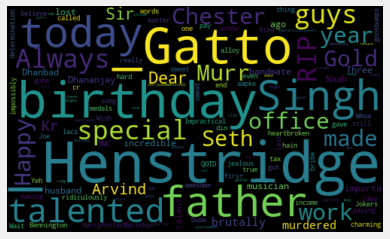

In [34]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
fig1 = plt.gcf()
plt.show()
html_str1 = mpld3.fig_to_html(fig1)

In [35]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Dear Sir, My father - Arvind Kr. Singh was ...",1.000000,-0.875000,Negative
1,"Three years ago today, we lost an incredible ...",0.950000,0.905000,Positive
2,Naah😁\nHarryPotterMarathon,0.000000,0.000000,Neutral
3,This one is special. You guys have no idea...,0.571429,0.357143,Positive
4,Are you jealous of him ?😂😂😂,0.000000,0.000000,Neutral
5,😂😂😂😂😂😂😂,0.000000,0.000000,Neutral
6,Always,0.000000,0.000000,Neutral
7,no words. so heartbroken. RIP Chester Benning...,0.000000,0.000000,Neutral
8,"The first ever song that gave me goosbumps ""I...",0.333333,0.250000,Positive
9,_Gatto Wish you a very very Happy Birthday Joe...,0.857143,0.785714,Positive


In [36]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j+1
        

1)  Three years ago today, we lost an incredible talent.

A father, a husband, a bandmate, a very talented musician, and an importa…

2)  This one is special. You guys have no idea... 

3)  The first ever song that gave me goosbumps "In the end it doesn't even matter" I can't believe he is gone. RIP CHESTER

4) _Gatto Wish you a very very Happy Birthday Joe.Dude, awesome work with Impractical Jokers.The special thing is that today's my birthday😁

5)  _Henstridge So true 😉😉😉

6)  Happy birthday to the ridiculously sweet, the impossibly charming, the always talented _henstridge! 

7)  QOTD: "Gold medals aren't really made of gold. They're made of sweat, determination, and a hard-to-find alloy called gut…

8)  Wait! Before the ImpracticalJokers return, _Gatto takes questions on a LIVE Pre-Show, Thurs, 9:30EST/6:30PST 

9) _Bam Loved your latest video a lot. Keep up the good work. Big fan of yours. :)
SorryDadBBkivines

10)    _Gatto Did much better than Q.

11)    Should have Murr in the 

In [37]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j+1

1)    Dear Sir, My father - Arvind Kr. Singh was brutally murdered by Dhananjay Singh from Dhanbad. T…



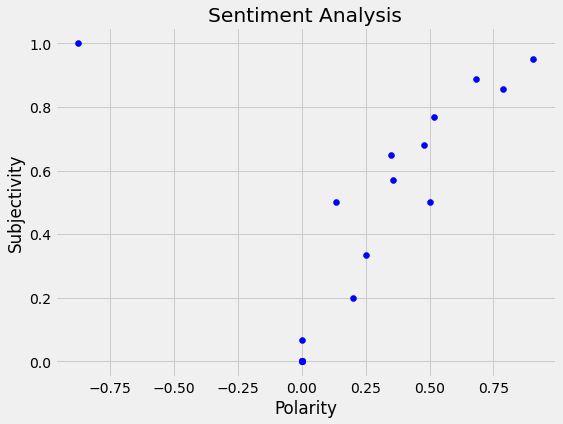

In [38]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [39]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
pper = round((ptweets.shape[0]/df.shape[0])*100, 1)

In [40]:
print(pper)

50.0


In [41]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
nper = round((ntweets.shape[0]/df.shape[0])*100, 1)

In [42]:
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']
neper = round((neutweets.shape[0]/df.shape[0])*100, 1)


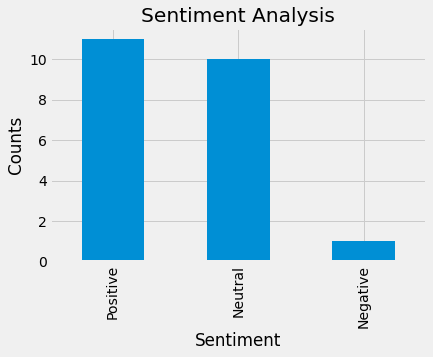

In [43]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [44]:
q, w, e = df['Analysis'].value_counts()

In [45]:
print(q)

11


In [46]:
print(w)

10


In [24]:
import os

In [25]:
os.rmdir('static/rem/')

FileNotFoundError: ignored